# Homework 2

## By Vyanna Hill

### Chapter 4

In [1]:
# From Chapter 4 section, by Allen Downey

# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim library
from modsim import *

Exercise 1
    Write a function called make_state that creates a State object with the state variables olin=10 and wellesley=2, and then returns the new State object.

In [2]:
#Function Make_State
def make_state():
    #creates state object and returns it 
    i=State(olin=10, wellesley=2)
    return i
init=make_state()
init

,values
olin,10
wellesley,2


Exercise 2
   Use linspace to make an array of 10 equally spaced numbers from 1 to 10 (including both)

In [3]:
l=linspace(1,10,10)
for i in l:
    print(i)

1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0
10.0


Exercise 3
    Use linrange to make an array of numbers from 1 to 11 with a step size of 2.

In [4]:
m=linrange(start=1,stop=11,step=2)
for i in l:
    print(i)

1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0
10.0


In [5]:
#From Chapter 3 notebook, by Allen Downey

def step(state, p1, p2):
    """Simulate one minute of time.
    
    state: bikeshare State object
    p1: probability of an Olin->Wellesley customer arrival
    p2: probability of a Wellesley->Olin customer arrival
    """
    if flip(p1):
        bike_to_wellesley(state)
    
    if flip(p2):
        bike_to_olin(state)
        
def bike_to_wellesley(state):
    """Move one bike from Olin to Wellesley.
    
    state: bikeshare State object
    """
    if state.olin == 0:
        state.olin_empty += 1
        return
    state.olin -= 1
    state.wellesley += 1
    
def bike_to_olin(state):
    """Move one bike from Wellesley to Olin.
    
    state: bikeshare State object
    """
    if state.wellesley == 0:
        state.wellesley_empty += 1
        return
    state.wellesley -= 1
    state.olin += 1
    
def decorate_bikeshare():
    """Add a title and label the axes."""
    decorate(title='Olin-Wellesley Bikeshare',
             xlabel='Time step (min)', 
             ylabel='Number of bikes')
    
def run_simulation(p1, p2, num_steps):
    """Simulate the given number of time steps.
    
    p1: probability of an Olin->Wellesley customer arrival
    p2: probability of a Wellesley->Olin customer arrival
    num_steps: number of time steps
    """
    state = State(olin=10, wellesley=2, 
                  olin_empty=0, wellesley_empty=0)
                    
    for i in range(num_steps):
        step(state, p1, p2)
        
    return state

Exercise 4
     Wrap this code in a function named sweep_p1 that takes an array called p1_array as a parameter. It should create a new SweepSeries, run a simulation for each value of p1 in p1_array, store the results in the SweepSeries, and return the SweepSeries.

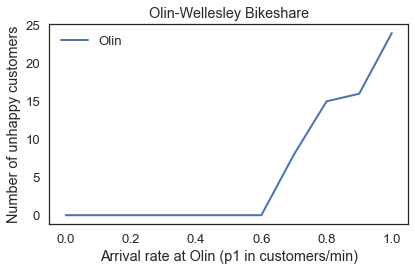

In [6]:
#Function sweep_p1: Wraps previous work above in a function
def sweep_p1(x):
    p2 = 0.5
    num_steps = 75
    sweep = SweepSeries()
    # Same steps but includes p2, numsteps in the function than as a parameter
    
    for i in x:
        state = run_simulation(i,p2, num_steps)
        sweep[i] = state.olin_empty
   
    #returns sweep series of the inputted p1_array
    return sweep


#Create array p1_array
p1_array = linspace(0, 1, 11)
results=sweep_p1(p1_array)

plot(results, label='Olin')

decorate(title='Olin-Wellesley Bikeshare',
         xlabel='Arrival rate at Olin (p1 in customers/min)', 
         ylabel='Number of unhappy customers')

Exercise 5
     Write a function called sweep_p2 that runs simulations with p1=0.5 and a range of values for p2. It should store the results in a SweepSeries and return the SweepSeries.

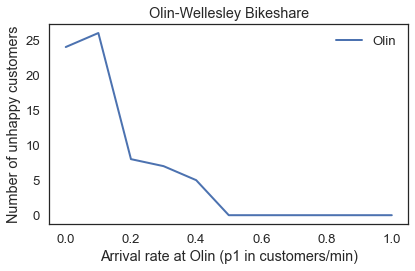

In [7]:
#Function sweep_p2: Wraps previous work above in a function but its range for p2
def sweep_p1(x):
    p1 = 0.5
    num_steps = 75
    sweep = SweepSeries()
    
    for i in x:
        state = run_simulation(p1,i, num_steps)
        sweep[i] = state.olin_empty
   
    #returns sweep series of the inputted p1_array
    return sweep


#Create array p1_array
p2_array = linspace(0, 1, 11)
results=sweep_p1(p2_array)

plot(results, label='Olin')

decorate(title='Olin-Wellesley Bikeshare',
         xlabel='Arrival rate at Olin (p1 in customers/min)', 
         ylabel='Number of unhappy customers')

Optional:
    Exercise 6
    Write a function called run_multiple_simulations that takes as parameters p1, p2, num_steps, and num_runs.After each run, it should store the total number of unhappy customers (at Olin or Wellesley) in a TimeSeries. At the end, it should return the TimeSeries. Display the resulting TimeSeries and use the mean function provided by the TimeSeries object to compute the average number of unhappy customers (see Section 2.7).

In [8]:
#Create rms using the parameters given 
def run_multiple_simulations(p1, p2, num_steps, num_runs):
    results = TimeSeries()
    state = State(olin=10, wellesley=2, olin_empty=0, wellesley_empty=0)

    #for loop to run the simulation 10 times
    for j in range(num_runs):  
        #for 60 steps: run the probability of bikes between Olin and Wellesy, record the unhappy customers in the timeseries
        for i in range(num_steps):
            step(state, p1, p2)
            results[i]=state.olin_empty
    return results

p1 = 0.3
p2 = 0.3
num_steps = 60
num_runs = 10
ten_runs=run_multiple_simulations(p1,p2,num_steps,num_runs)
ten_runs.mean()

2.0

Optional:
    Exercise 7
        Continuting the previous exercise, use run_multiple_simulations to run simulations with a range of values for p1 and
        p2 = 0.3
        num_steps = 60
        num_runs = 20
Store the results in a SweepSeries, then plot the average number of unhappy customers as a function of p1. Label the axes.
What value of p1 minimizes the average number of unhappy customers?
   

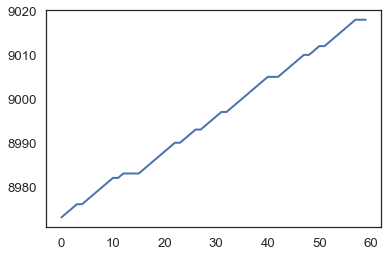

In [9]:
def run_multiple_simulations(p1, p2, num_steps, num_runs):
    sweep = SweepSeries()
    state = State(olin=10, wellesley=2, olin_empty=0, wellesley_empty=0)

    #for loop to run the simulation 10 times
    for j in range(num_runs):  
    # Change the p1 value through the p1 array
        for i in p1:
            for i in range(num_steps):
                step(state, i, p2)
                sweep[i]=state.olin_empty
    return sweep

p1_array = linspace(0, 1, 11)
p2 = 0.3
num_steps = 60
num_runs = 20
results=run_multiple_simulations(p1_array, p2, num_steps, num_runs)
plot(results, label='Olin')



### Chapter 5


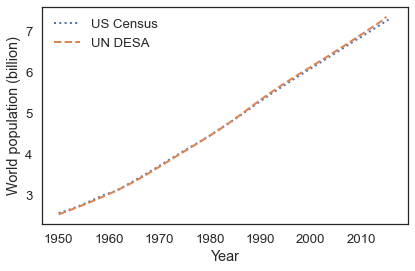

In [10]:
from pandas import read_html

#Note: There is no save as html in wiki, Save as html with right click work,changed file name for simplicity 
filename = 'World_population_estimates.html'
tables = read_html(filename,header=0,index_col=0,decimal='M')

table2 = tables[2]
table2.columns = ['census', 'prb', 'un', 'maddison', 
                  'hyde', 'tanton', 'biraben', 'mj', 
                  'thomlinson', 'durand', 'clark']
table2.head()
census = table2.census
census.head()
un = table2.un / 1e9
census = table2.census / 1e9
plot(census, ':', label='US Census')
plot(un, '--', label='UN DESA')
    
decorate(xlabel='Year',
         ylabel='World population (billion)')

Exercise 1

In [11]:
#1) Elemental difference between census and un
e_d=census-un
print(e_d)

#2)absolute differences
abs_diff=abs(census - un)
print(abs_diff)

#3) relative differences
r_diff=abs(census - un) / un
print(r_diff)

#4) percent differences
p_diff=abs(census - un) / un * 100
print(p_diff)



Year
1950    0.032480
1951    0.022089
1952    0.017480
1953    0.016188
1954    0.017056
          ...   
2012   -0.066201
2013   -0.069991
2014   -0.073816
2015   -0.101579
2016         NaN
Length: 67, dtype: float64
Year
1950    0.032480
1951    0.022089
1952    0.017480
1953    0.016188
1954    0.017056
          ...   
2012    0.066201
2013    0.069991
2014    0.073816
2015    0.101579
2016         NaN
Length: 67, dtype: float64
Year
1950    0.012862
1951    0.008585
1952    0.006674
1953    0.006072
1954    0.006286
          ...   
2012    0.009350
2013    0.009772
2014    0.010190
2015    0.013821
2016         NaN
Length: 67, dtype: float64
Year
1950    1.286247
1951    0.858540
1952    0.667365
1953    0.607232
1954    0.628640
          ...   
2012    0.935034
2013    0.977243
2014    1.019023
2015    1.382129
2016         NaN
Length: 67, dtype: float64


In [12]:
t_0 = get_first_label(census)
t_end = get_last_label(census)
elapsed_time = t_end - t_0
p_0 = get_first_value(census)
p_end = get_last_value(census)
total_growth = p_end - p_0
annual_growth = total_growth / elapsed_time

results = TimeSeries()
results[t_0] = census[t_0]
results

,values
1950,2.557629


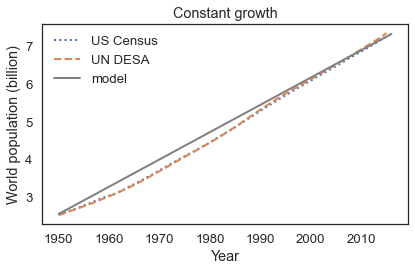

In [13]:
for t in linrange(t_0, t_end):
    results[t+1] = results[t] + annual_growth
    
plot(census, ':', label='US Census')
plot(un, '--', label='UN DESA')
plot(results, color='gray', label='model')

decorate(xlabel='Year', 
         ylabel='World population (billion)',
         title='Constant growth')

Optional:
    Exercise 2
         Try fitting the model using data from 1970 to the present, and see if that does a better job.



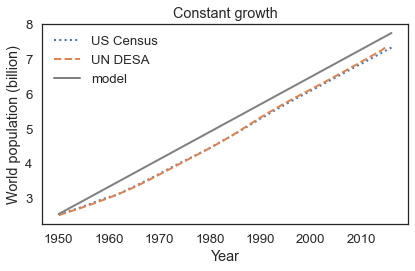

In [14]:
elapsed_time=2016-1970
p_s=census[1970]
p_e=census[2016]
total_growth = p_e - p_s
annual_growth = total_growth / elapsed_time



results = TimeSeries()
results[t_0] = census[t_0]
for t in linrange(t_0, t_end):
    results[t+1] = results[t] + annual_growth
    
plot(census, ':', label='US Census')
plot(un, '--', label='UN DESA')
plot(results, color='gray', label='model')

decorate(xlabel='Year', 
         ylabel='World population (billion)',
         title='Constant growth')


It appears to widen the gap!
